In [13]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [33]:
# Step 2: Load Dataset
df = pd.read_csv("student_sleep_patterns_updated.csv")
print("Shape of Dataset:", df.shape)
df.head(10)

Shape of Dataset: (500, 16)


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Academic_Score,Performance_Level
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,48.835920,Moderate
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,50.997783,Moderate
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,44.789357,Moderate
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,57.926829,Moderate
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,53.769401,Moderate
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51,88.525499,High
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81,85.532151,High
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02,78.769401,High
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78,60.476718,Moderate
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37,50.277162,Moderate


In [ ]:
df.tail(20)

In [7]:
# Step 3: Check Data Types and Null Values
print("\nData Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
 14  Academic_Score       500 non-null    float64
 15  Performance_Level    500 non

In [8]:
# Step 4: Drop Missing Values 
df_clean = df.dropna()
print("\nShape after dropping nulls:", df_clean.shape)


Shape after dropping nulls: (500, 16)


In [9]:
# Step 5: Basic Statistics
print("\nStatistical Summary:")
print(df_clean.describe())


Statistical Summary:
       Student_ID        Age  Sleep_Duration  Study_Hours  Screen_Time  \
count  500.000000  500.00000      500.000000   500.000000   500.000000   
mean   250.500000   21.53600        6.472400     5.981600     2.525000   
std    144.481833    2.33315        1.485764     3.475725     0.859414   
min      1.000000   18.00000        4.000000     0.100000     1.000000   
25%    125.750000   20.00000        5.100000     2.900000     1.800000   
50%    250.500000   21.00000        6.500000     6.050000     2.600000   
75%    375.250000   24.00000        7.800000     8.800000     3.300000   
max    500.000000   25.00000        9.000000    12.000000     4.000000   

       Caffeine_Intake  Physical_Activity  Sleep_Quality  Weekday_Sleep_Start  \
count       500.000000         500.000000     500.000000           500.000000   
mean          2.462000          62.342000       5.362000            11.166860   
std           1.682325          35.191674       2.967249            

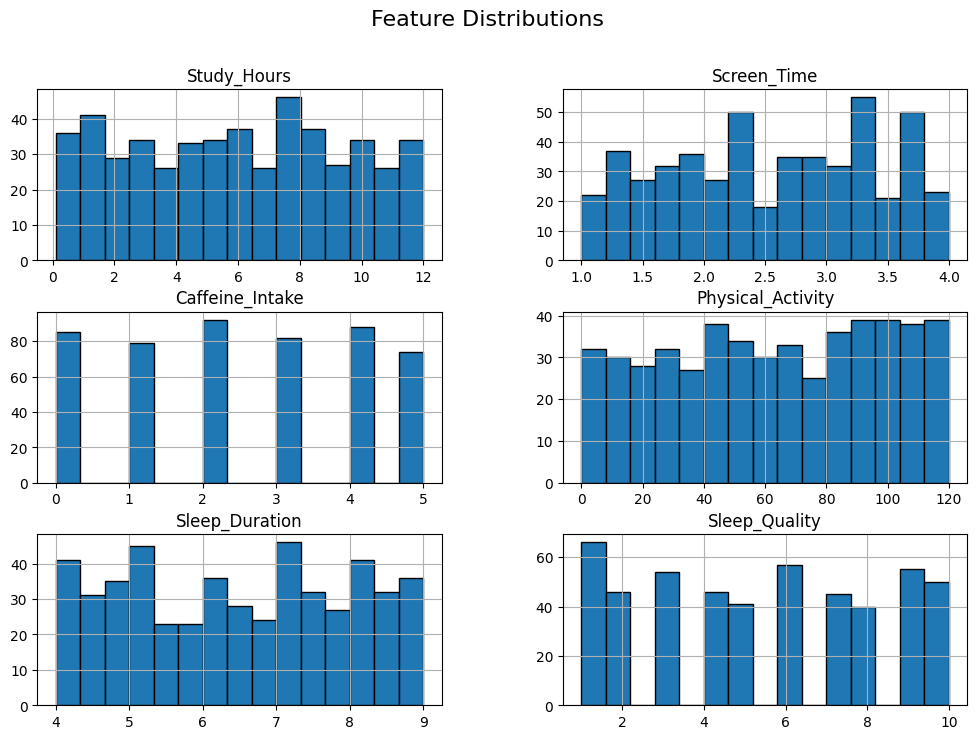

In [10]:
# Step 6: Feature Distribution
features = [
    "Study_Hours", "Screen_Time", "Caffeine_Intake",
    "Physical_Activity", "Sleep_Duration", "Sleep_Quality"
]

df_clean[features].hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

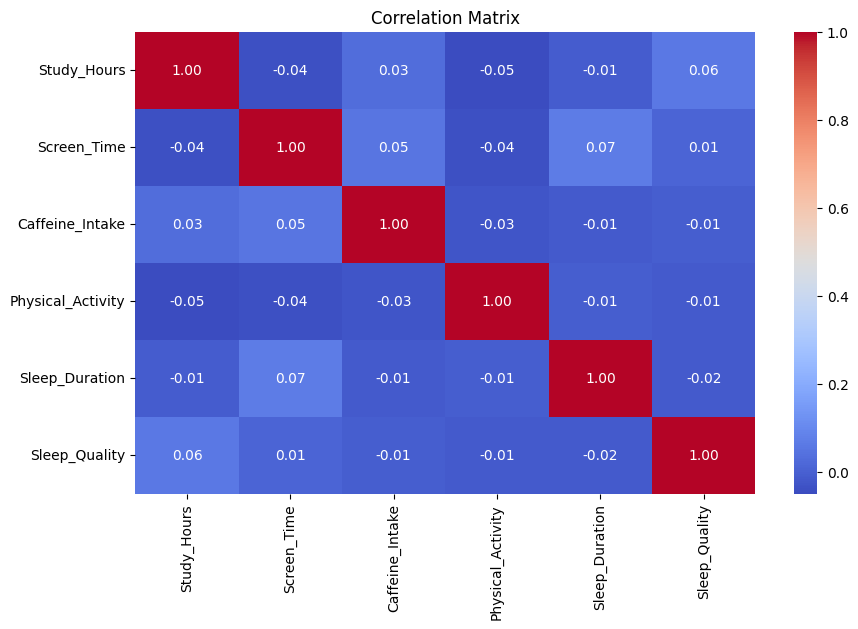

In [11]:
# Step 7: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

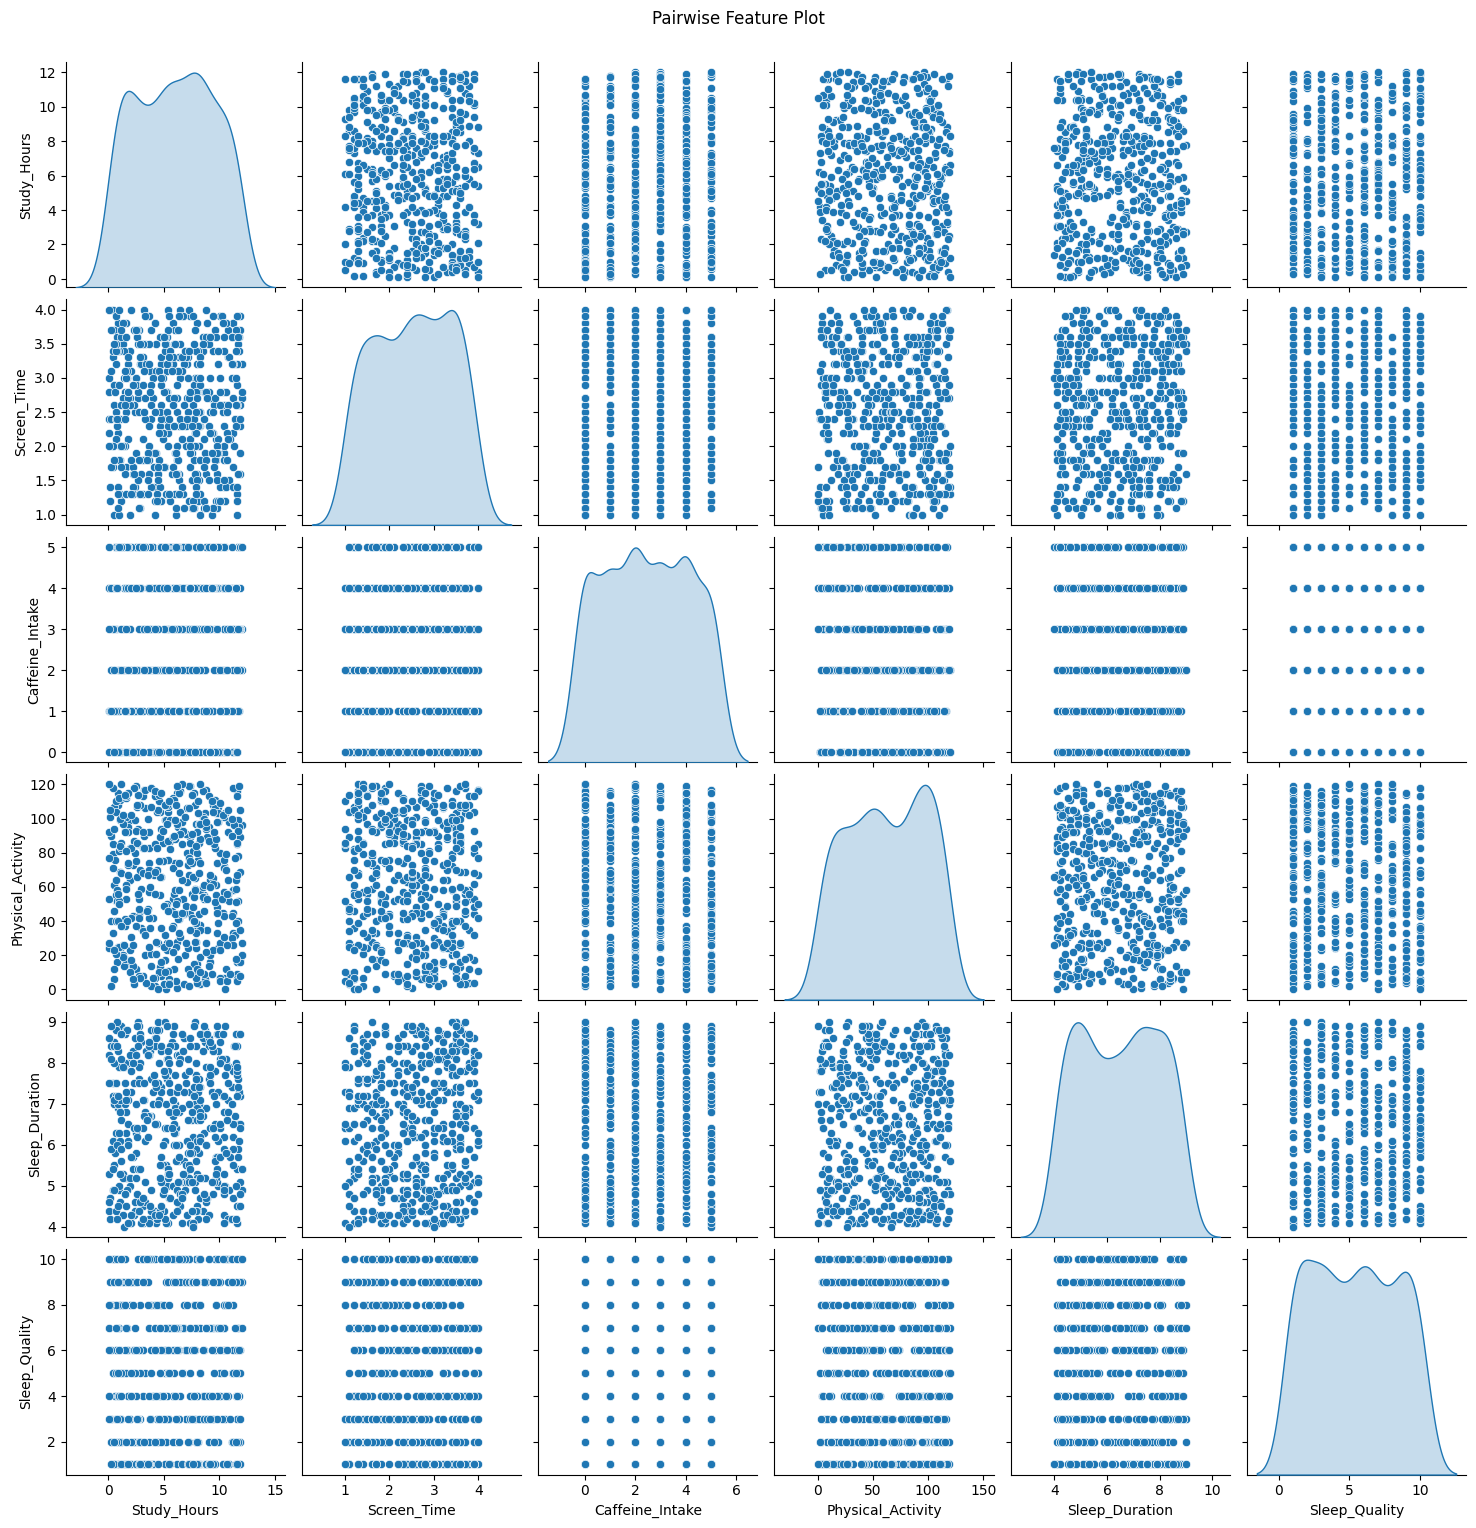

In [12]:
# Step 8: Pairplot 
sns.pairplot(df_clean[features], diag_kind="kde")
plt.suptitle("Pairwise Feature Plot", y=1.02)
plt.show()


In [14]:
# Step 9: Clustering - Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean[features])

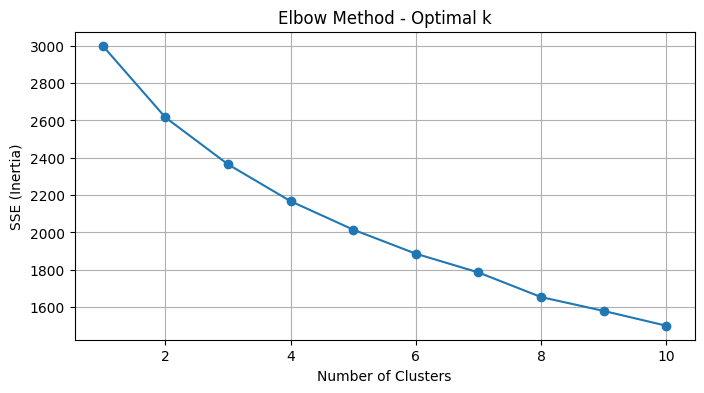

In [15]:
# Step 10: Elbow Method for KMeans
# -----------------------------------------
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

In [16]:
# Step 11: KMeans Clustering (3 Clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
df_clean['KMeans_Cluster'] = kmeans_labels


In [17]:
# Step 12: GMM Clustering (3 Clusters)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
df_clean['GMM_Cluster'] = gmm_labels

In [18]:
# Step 13: PCA for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['KMeans'] = kmeans_labels
pca_df['GMM'] = gmm_labels

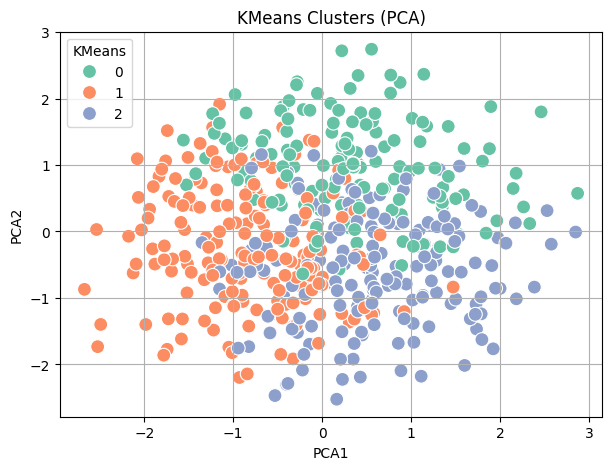

In [19]:
# Step 14: Visualize KMeans Clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans', data=pca_df, palette='Set2', s=100)
plt.title("KMeans Clusters (PCA)")
plt.grid(True)
plt.show()

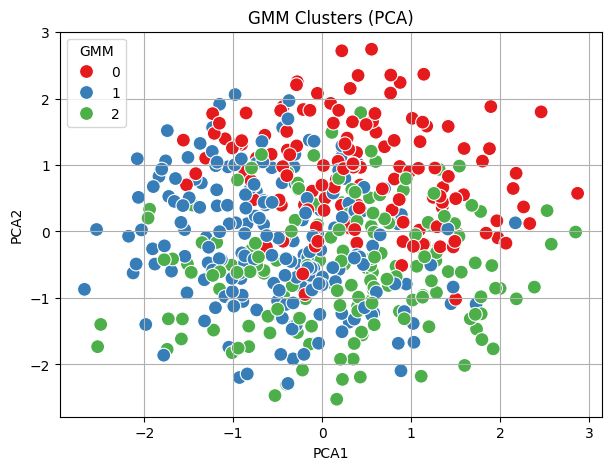

In [20]:
# Step 15: Visualize GMM Clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM', data=pca_df, palette='Set1', s=100)
plt.title("GMM Clusters (PCA)")
plt.grid(True)
plt.show()

In [32]:
#Assign cluster list
features = [
    "Study_Hours", "Screen_Time", "Caffeine_Intake",
    "Physical_Activity", "Sleep_Duration", "Sleep_Quality"
]
data = df[features].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Map cluster number to behavior label (adjust if needed)
cluster_labels = {
    0: "Oversleeper",
    1: "Balanced Sleeper",
    2: "Night Owl"
}

# Add cluster and label to the data
data["Cluster"] = clusters
data["Sleep_Behavior"] = data["Cluster"].map(cluster_labels)

# Show the result
data.head(20)



,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Duration,Sleep_Quality,Cluster,Sleep_Behavior
0,7.9,3.4,2,37,7.7,10,1,Balanced Sleeper
1,6.0,1.9,5,74,6.3,2,2,Night Owl
2,6.7,3.9,5,53,5.1,5,1,Balanced Sleeper
3,8.6,2.8,4,55,6.3,9,1,Balanced Sleeper
4,2.7,2.7,0,85,4.7,3,2,Night Owl
5,12.0,3.2,3,96,4.9,9,1,Balanced Sleeper
6,11.7,3.4,1,99,6.5,6,1,Balanced Sleeper
7,7.8,3.0,1,108,6.1,4,2,Night Owl
8,2.4,1.4,1,86,8.6,7,0,Oversleeper
9,8.2,2.0,3,44,5.8,8,1,Balanced Sleeper


In [30]:
#Performance analysis- acedmics
features = [
    "Study_Hours", "Screen_Time", "Caffeine_Intake",
    "Physical_Activity", "Sleep_Duration", "Sleep_Quality"
]
data = df[features].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering for academic performance
kmeans_academic = KMeans(n_clusters=3, random_state=42)
academic_clusters = kmeans_academic.fit_predict(data_scaled)

# Map cluster number to academic label (adjust based on centroids)
academic_labels = {
    0: "Non-Performer",
    1: "Performer",
    2: "Average"
}

# Add cluster and label to the data
data["Academic_Cluster"] = academic_clusters
data["Academic_Performance"] = data["Academic_Cluster"].map(academic_labels)

# Show the result
data.head()


,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Duration,Sleep_Quality,Academic_Cluster,Academic_Performance
0,7.9,3.4,2,37,7.7,10,1,Performer
1,6.0,1.9,5,74,6.3,2,2,Average
2,6.7,3.9,5,53,5.1,5,1,Performer
3,8.6,2.8,4,55,6.3,9,1,Performer
4,2.7,2.7,0,85,4.7,3,2,Average
